In [2]:
import pandas as pd

* 전체 댓글 가져오기

In [88]:
all_comments = pd.read_csv('all_comments.txt', sep=',')
display(all_comments)
type(all_comments)

,Unnamed: 0,0,Unnamed: 0.1,댓글
0,0,신고하고왔어요...,NaN,NaN
1,1,무슨소통을 하실려고,NaN,NaN
2,2,고영욱 sns하고 조두순 출소하고 손정우 구속영장 기각되고.....이게 2020년이...,NaN,NaN
3,3,소통은 오프라인으로 지인들이랑 만나서 해...,NaN,NaN
4,4,스토리 공유하겠습니다...어디서 스멀스멀 기어나올려고...🤔,NaN,NaN
...,...,...,...,...
110534,4192,우와 잘생겼어요 ^_^,NaN,NaN
110535,4193,ㅡ,NaN,NaN
110536,4194,아아는 아이스아메리카노인데 ㅋㅋ,NaN,NaN
110537,4195,뒷모습이 힘들어보이네요 동병상련의 느낌은 왜일까요 마음은 힘들지 않아,NaN,NaN


pandas.core.frame.DataFrame

In [91]:
all_comments = all_comments.iloc[:,1]
all_comments

0                                                신고하고왔어요...
1                                                무슨소통을 하실려고
2         고영욱 sns하고 조두순 출소하고 손정우 구속영장 기각되고.....이게 2020년이...
3                                 소통은 오프라인으로 지인들이랑 만나서 해...
4                         스토리 공유하겠습니다...어디서 스멀스멀 기어나올려고...🤔
                                ...                        
110534                                         우와 잘생겼어요 ^_^
110535                                                    ㅡ
110536                                    아아는 아이스아메리카노인데 ㅋㅋ
110537               뒷모습이 힘들어보이네요 동병상련의 느낌은 왜일까요 마음은 힘들지 않아
110538                                  넉살 착하다. 장성규 애도 봐주고.
Name: 0, Length: 110539, dtype: object

In [104]:
all_comments_df = pd.DataFrame(all_comments)
all_comments_df.columns = ['comments']
all_comments_df.columns

Index(['comments'], dtype='object')

### 불용어 처리

In [120]:
# 중복된 댓글 제거
raw_data = all_comments_df.drop_duplicates(subset='comments', keep='first', inplace=False)
raw_data

,comments
0,신고하고왔어요...
1,무슨소통을 하실려고
2,고영욱 sns하고 조두순 출소하고 손정우 구속영장 기각되고.....이게 2020년이...
3,소통은 오프라인으로 지인들이랑 만나서 해...
4,스토리 공유하겠습니다...어디서 스멀스멀 기어나올려고...🤔
...,...
110533,@jangsk83 기부동참 고마워🙇‍♂️
110534,우와 잘생겼어요 ^_^
110536,아아는 아이스아메리카노인데 ㅋㅋ
110537,뒷모습이 힘들어보이네요 동병상련의 느낌은 왜일까요 마음은 힘들지 않아


In [121]:
# 태그 @[아이디] 제거
raw_data['comments'] = raw_data['comments'].str.replace('@[a-zA-Z가-힣\w\.\_\d]+', '')
raw_data

C:\Users\A\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,comments
0,신고하고왔어요...
1,무슨소통을 하실려고
2,고영욱 sns하고 조두순 출소하고 손정우 구속영장 기각되고.....이게 2020년이...
3,소통은 오프라인으로 지인들이랑 만나서 해...
4,스토리 공유하겠습니다...어디서 스멀스멀 기어나올려고...🤔
...,...
110533,기부동참 고마워🙇‍♂️
110534,우와 잘생겼어요 ^_^
110536,아아는 아이스아메리카노인데 ㅋㅋ
110537,뒷모습이 힘들어보이네요 동병상련의 느낌은 왜일까요 마음은 힘들지 않아


In [122]:
# 한글/영어/숫자 제외한 문자 제거
raw_data['comments'] = raw_data['comments'].str.replace('[^a-zA-Z가-힣0-9ㄱ-ㅎㅏ-ㅣ\s]', '')
raw_data

C:\Users\A\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,comments
0,신고하고왔어요
1,무슨소통을 하실려고
2,고영욱 sns하고 조두순 출소하고 손정우 구속영장 기각되고이게 2020년이라는게 믿...
3,소통은 오프라인으로 지인들이랑 만나서 해
4,스토리 공유하겠습니다어디서 스멀스멀 기어나올려고
...,...
110533,기부동참 고마워
110534,우와 잘생겼어요
110536,아아는 아이스아메리카노인데 ㅋㅋ
110537,뒷모습이 힘들어보이네요 동병상련의 느낌은 왜일까요 마음은 힘들지 않아


In [123]:
# 빈공백 글자 ' '로 통일
raw_data['comments'] = raw_data['comments'].str.replace('\s[\s*]', '')
raw_data

C:\Users\A\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,comments
0,신고하고왔어요
1,무슨소통을 하실려고
2,고영욱 sns하고 조두순 출소하고 손정우 구속영장 기각되고이게 2020년이라는게 믿...
3,소통은 오프라인으로 지인들이랑 만나서 해
4,스토리 공유하겠습니다어디서 스멀스멀 기어나올려고
...,...
110533,기부동참 고마워
110534,우와 잘생겼어요
110536,아아는 아이스아메리카노인데 ㅋㅋ
110537,뒷모습이 힘들어보이네요 동병상련의 느낌은 왜일까요 마음은 힘들지 않아


In [124]:
raw_data['comments'] = raw_data['comments'].str.rstrip()
raw_data['comments'] = raw_data['comments'].str.lstrip()
raw_data

C:\Users\A\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\A\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,comments
0,신고하고왔어요
1,무슨소통을 하실려고
2,고영욱 sns하고 조두순 출소하고 손정우 구속영장 기각되고이게 2020년이라는게 믿...
3,소통은 오프라인으로 지인들이랑 만나서 해
4,스토리 공유하겠습니다어디서 스멀스멀 기어나올려고
...,...
110533,기부동참 고마워
110534,우와 잘생겼어요
110536,아아는 아이스아메리카노인데 ㅋㅋ
110537,뒷모습이 힘들어보이네요 동병상련의 느낌은 왜일까요 마음은 힘들지 않아


In [125]:
# 빈댓글 제거
raw_data = raw_data[raw_data['comments']!='']

In [126]:
raw_data[raw_data['comments'] == '  '].count()

comments    0
dtype: int64

In [127]:
raw_data['comments'].isna().sum()

1

In [130]:
# 결측값 제거
raw_data = raw_data[raw_data['comments'].isna()==False]

In [131]:
raw_data['comments'].isna().sum()

0

In [134]:
raw_data

,comments
0,신고하고왔어요
1,무슨소통을 하실려고
2,고영욱 sns하고 조두순 출소하고 손정우 구속영장 기각되고이게 2020년이라는게 믿...
3,소통은 오프라인으로 지인들이랑 만나서 해
4,스토리 공유하겠습니다어디서 스멀스멀 기어나올려고
...,...
110533,기부동참 고마워
110534,우와 잘생겼어요
110536,아아는 아이스아메리카노인데 ㅋㅋ
110537,뒷모습이 힘들어보이네요 동병상련의 느낌은 왜일까요 마음은 힘들지 않아


In [136]:
comments_split = raw_data['comments'].apply(list).tolist()
comments_split

[['신', '고', '하', '고', '왔', '어', '요'],
 ['무', '슨', '소', '통', '을', ' ', '하', '실', '려', '고'],
 ['고',
  '영',
  '욱',
  ' ',
  's',
  'n',
  's',
  '하',
  '고',
  ' ',
  '조',
  '두',
  '순',
  ' ',
  '출',
  '소',
  '하',
  '고',
  ' ',
  '손',
  '정',
  '우',
  ' ',
  '구',
  '속',
  '영',
  '장',
  ' ',
  '기',
  '각',
  '되',
  '고',
  '이',
  '게',
  ' ',
  '2',
  '0',
  '2',
  '0',
  '년',
  '이',
  '라',
  '는',
  '게',
  ' ',
  '믿',
  '기',
  '지',
  '가',
  ' ',
  '않',
  '네',
  '요'],
 ['소',
  '통',
  '은',
  ' ',
  '오',
  '프',
  '라',
  '인',
  '으',
  '로',
  ' ',
  '지',
  '인',
  '들',
  '이',
  '랑',
  ' ',
  '만',
  '나',
  '서',
  ' ',
  '해'],
 ['스',
  '토',
  '리',
  ' ',
  '공',
  '유',
  '하',
  '겠',
  '습',
  '니',
  '다',
  '어',
  '디',
  '서',
  ' ',
  '스',
  '멀',
  '스',
  '멀',
  ' ',
  '기',
  '어',
  '나',
  '올',
  '려',
  '고'],
 ['조',
  '두',
  '순',
  '도',
  ' ',
  'S',
  'N',
  'S',
  ' ',
  '한',
  '다',
  '고',
  ' ',
  '할',
  '수',
  '도',
  ' ',
  'ㅋ',
  'ㅋ',
  'ㄱ',
  'ㅋ',
  'ㄱ',
  'ㅋ',
  'ㄲ',
  'ㅋ'],
 ['고',
  '영',
  '욱',
  

### WordCloud 만들기

In [137]:
from collections import Counter

In [147]:
syllable_list = []
for sentence in comments_split:
    # print(sentence)
    for i in sentence:
        syllable_list.append(i)

In [153]:
# 빈도수
count = Counter(syllable_list)
syllable = dict(count.most_common())
syllable

{' ': 156412,
 'ㅋ': 32644,
 '이': 20469,
 '다': 14235,
 '고': 11983,
 '요': 11577,
 '가': 11453,
 '는': 10880,
 '아': 10678,
 '하': 10591,
 '지': 10055,
 '니': 8526,
 '어': 8137,
 '나': 7898,
 '도': 7394,
 'ㅠ': 7046,
 '에': 6744,
 '기': 6283,
 '사': 5569,
 '서': 5368,
 '시': 5246,
 '리': 5203,
 '거': 5090,
 '해': 4816,
 '은': 4729,
 '들': 4601,
 '라': 4552,
 '인': 4541,
 '게': 4523,
 '데': 4434,
 '그': 4299,
 '로': 4289,
 '한': 4246,
 '을': 4229,
 '네': 4176,
 '보': 4138,
 '자': 3975,
 '면': 3948,
 '야': 3675,
 '여': 3624,
 'e': 3583,
 '오': 3559,
 '있': 3352,
 '마': 3332,
 '만': 3316,
 '으': 3312,
 '대': 3291,
 '세': 3271,
 'o': 3260,
 '무': 3240,
 '우': 3169,
 '진': 3032,
 '주': 2992,
 'a': 2986,
 '내': 2895,
 '안': 2883,
 '제': 2670,
 '스': 2648,
 '님': 2622,
 '의': 2617,
 '정': 2606,
 't': 2529,
 'n': 2501,
 'i': 2450,
 '저': 2442,
 '너': 2399,
 '미': 2345,
 '생': 2335,
 '상': 2298,
 's': 2295,
 '원': 2270,
 '일': 2268,
 'ㅜ': 2267,
 '수': 2240,
 '까': 2217,
 '구': 2205,
 '말': 2128,
 'ㅎ': 2114,
 '좋': 2029,
 '와': 2010,
 '짜': 1985,
 '소': 1973,
 '부'

In [181]:
sw = [' ', '[a-zA-z]',1,2,3,4,5,6,7,8,9,0]
syllable_list = [syllable for syllable in syllable_list if syllable not in sw]

In [184]:
count = Counter(syllable_list)
syllables = dict(count.most_common())

In [175]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [176]:
import matplotlib
from IPython.display import set_matplotlib_formats
matplotlib.rc('font',family = 'Malgun Gothic')

set_matplotlib_formats('retina')

matplotlib.rc('axes',unicode_minus = False)

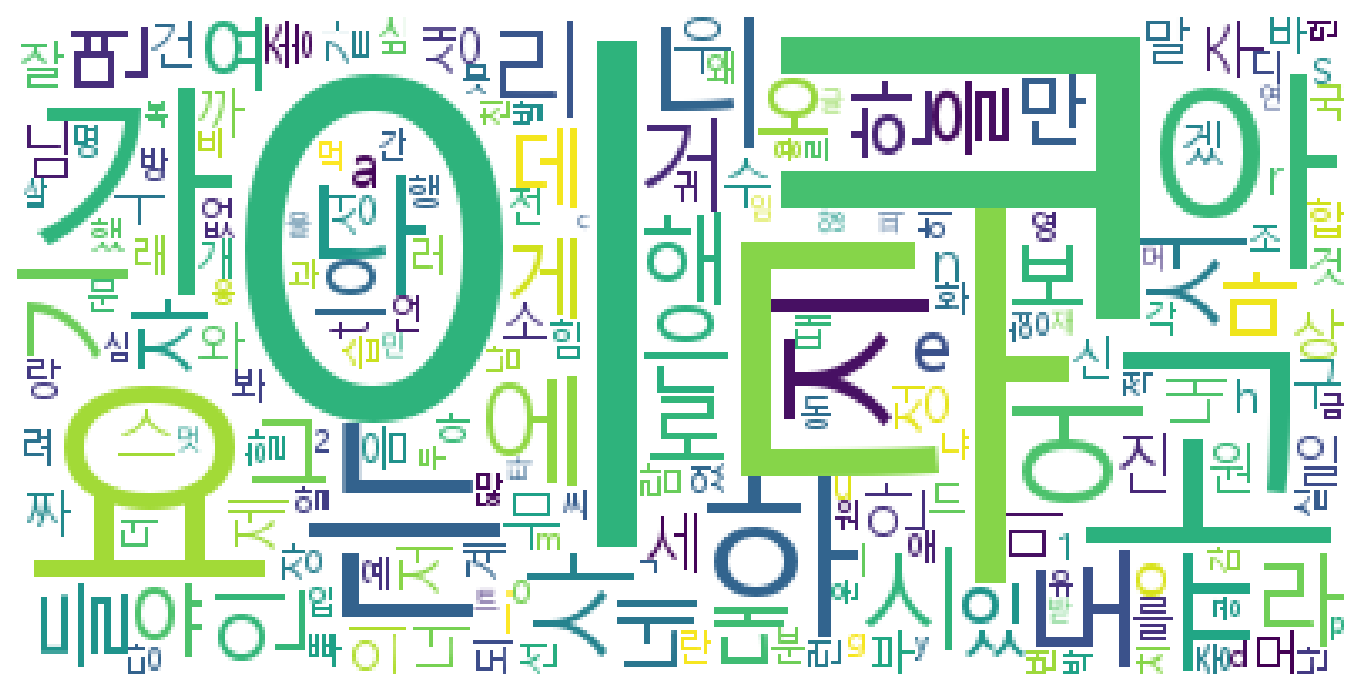

In [185]:
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(syllables)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [186]:
wordcloud.to_file('syllable_wordcloud.png')